<a href="https://colab.research.google.com/github/Vixuz144/Econometria/blob/main/Modelo_Autoregresivo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [433]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime
from scipy.stats import t

In [434]:
#
# import openpyxl
# import statistics as st
# import matplotlib as mpl

In [435]:
!git clone https://github.com/Vixuz144/Econometria

Cloning into 'Econometria'...
remote: Enumerating objects: 9, done.
remote: Counting objects: 100% (9/9), done.
remote: Compressing objects: 100% (7/7), done.
remote: Total 9 (delta 1), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (9/9), 484.39 KiB | 18.63 MiB/s, done.
Resolving deltas: 100% (1/1), done.


In [436]:
cd Econometria

/content/Econometria/Econometria/Econometria/Econometria/Econometria/Econometria/Econometria/Econometria/Econometria/Econometria/Econometria/Econometria/Econometria/Econometria/Econometria/Econometria/Econometria/Econometria/Econometria/Econometria/Econometria/Econometria/Econometria/Econometria/Econometria/Econometria/Econometria/Econometria


In [437]:
base1  = pd.read_excel("Base_Examen2.xlsx")

In [438]:
primera_fecha = datetime.datetime.fromisoformat("2002-07-01")
ultima_fecha = datetime.datetime.fromisoformat("2022-04-01")
print(primera_fecha)
print(ultima_fecha)

2002-07-01 00:00:00
2022-04-01 00:00:00


In [439]:
a = base1.to_numpy()
base = np.delete(a, 0, 0)

l = list(base[:,0]).index(primera_fecha)
# m = list(base[:,0]).index(ultima_fecha)
m = datetime.datetime.fromisoformat("2022-04-01")
#print(l)

for i in range(l):
  base = np.delete(base,0,0)
#print(base)

n = len(base[:,1])

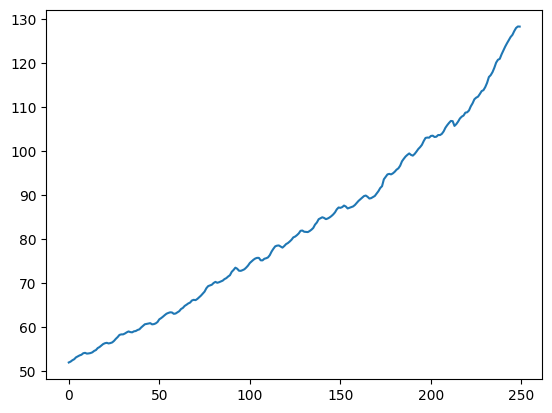

In [440]:
plt.plot(base[:,1])
plt.show()

In [441]:
meses = np.array([])
for i in range(0,n):
  meses = np.append(meses,base[i,0].month)

t12 = pd.get_dummies(meses).to_numpy()
print(t12)

x_mes = np.stack([np. ones(n), t12[:, 1], t12[:, 2], t12[:, 3], t12[:, 4], t12[:, 5], t12[:, 6], t12[:, 7], t12[:, 8], t12[:, 9], t12[:, 10], t12[:, 11]], axis = 1)
print(x_mes)

n_param = len(x_mes[1,:])
grad_lib = n - n_param
print(grad_lib, n_param)

[[False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]
 ...
 [False  True False ... False False False]
 [False False  True ... False False False]
 [False False False ... False False False]]
[[1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [1. 1. 0. ... 0. 0. 0.]
 [1. 0. 1. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]]
238 12


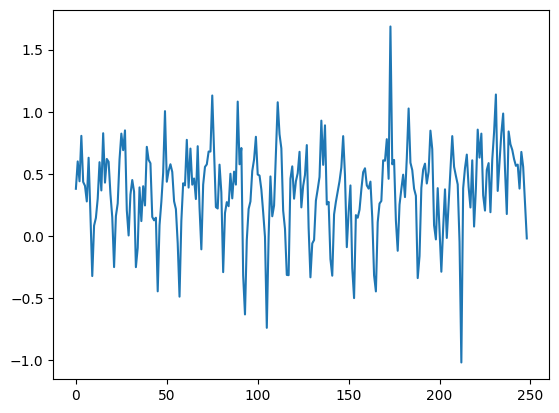

In [442]:
##Variable Exógena
y1 = 100 * np.diff(np.log(np.array(base[:, 1], float)))
plt.plot(y1)
plt.show()

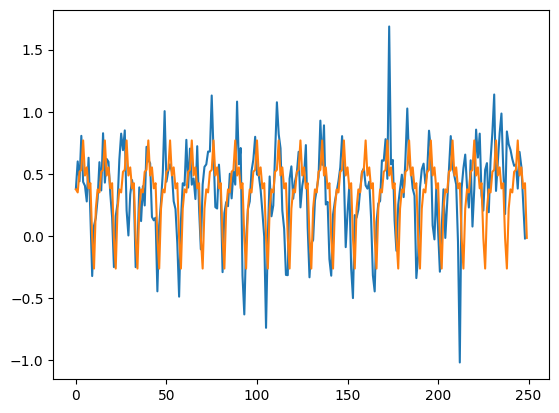

In [443]:
At = np.transpose(x_mes[1:, :]).dot(x_mes[1:, :])
Bt = np.transpose(x_mes[1:, :]).dot(y1)
gamma_est = np.linalg.solve(At,Bt)
#print(gamma_est)
gamma_mes = gamma_est + np.mean(y1)

y_est = np.dot(x_mes, gamma_est)
plt.plot(y1)
plt.plot(y_est)
plt.show()

In [444]:
res = y1 - y_est[1:]
it = np.linalg.inv(At)
var_mes = np.diag(np.var(res,ddof=n_param)*it)
desv_mes = np.sqrt(var_mes)

In [445]:


t_stad = gamma_est/desv_mes



p_val = t.cdf(-np.abs(t_stad), grad_lib) + 1 - t.cdf(np.abs(t_stad), grad_lib)
print(p_val)

[0.00000000e+00 2.70557445e-02 9.58976181e-02 1.45572443e-12
 0.00000000e+00 2.23819019e-05 2.21818552e-02 8.45499558e-03
 6.41891578e-01 7.98628284e-01 4.58863555e-03 3.91313760e-01]


In [446]:
dec = 20
tabla = pd.DataFrame(np.round(np.stack((gamma_est, desv_mes, t_stad, p_val), 1),dec),
                     index = ["const", 'feb', 'mar', 'abr', 'may', 'jun', 'jul', 'ago', 'sep', 'oct', 'nov', 'dic'],
                     columns = ['beta_hat', 'desv', 't_stad', 'p_val'])

print(tabla)

       beta_hat      desv     t_stad         p_val
const  0.551476  0.053663  10.276747  0.000000e+00
feb   -0.168815  0.075890  -2.224466  2.705574e-02
mar   -0.126866  0.075890  -1.671700  9.589762e-02
abr   -0.567404  0.075890  -7.476644  1.455724e-12
may   -0.814291  0.076833 -10.598186  0.000000e+00
jun   -0.332357  0.076833  -4.325710  2.238190e-05
jul   -0.176893  0.076833  -2.302305  2.218186e-02
ago   -0.201523  0.075890  -2.655459  8.454996e-03
sep   -0.035338  0.075890  -0.465650  6.418916e-01
oct   -0.019383  0.075890  -0.255408  7.986283e-01
nov    0.217176  0.075890   2.861717  4.588636e-03
dic   -0.065175  0.075890  -0.858802  3.913138e-01
